In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

Using TensorFlow backend.


## Load data

In [2]:
data_train = pd.read_csv("data/train_images.csv", header=None)
labels_train = pd.read_csv("data/train_labels.csv")

data_test = pd.read_csv("data/test_images.csv", header=None)
labels_test = pd.read_csv("data/test_labels.csv")

print("Train-data rows: {}, Train-data columns: {}".format(data_train.shape[0], data_train.shape[1]))
print("Train-labels rows: {}, Train-labels columns: {}".format(labels_train.shape[0], labels_train.shape[1]))

print("Test-data rows: {}, Test-data columns: {}".format(data_test.shape[0], data_test.shape[1]))
print("Test-labels rows: {}, Test-labels columns: {}".format(labels_test.shape[0], labels_test.shape[1]))

Train-data rows: 7000, Train-data columns: 12100
Train-labels rows: 7000, Train-labels columns: 4
Test-data rows: 2734, Test-data columns: 12100
Test-labels rows: 2734, Test-labels columns: 4


In [3]:
labels_train.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


## EDA

In [4]:
train_volcano = labels_train["Volcano?"].value_counts()
train_volcano_freq = labels_train["Volcano?"].value_counts(normalize=True)

print("Training Data Target Count")
print(train_volcano)

print("\nTraining Data Target Frequency")
print(train_volcano_freq)

Training Data Target Count
0    6000
1    1000
Name: Volcano?, dtype: int64

Training Data Target Frequency
0    0.857143
1    0.142857
Name: Volcano?, dtype: float64


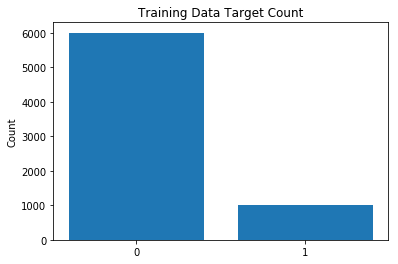

In [5]:
fig, ax = plt.subplots()
ax.bar(x=train_volcano.index, height=train_volcano.values, tick_label=[0, 1])
ax.set_title("Training Data Target Count")
ax.set_ylabel("Count")
plt.show()

In [6]:
test_volcano = labels_test["Volcano?"].value_counts()
test_volcano_freq = labels_test["Volcano?"].value_counts(normalize=True)

print("Test Data Target Count")
print(test_volcano)

print("\nTest Data Target Frequency")
print(test_volcano_freq)

Test Data Target Count
0    2300
1     434
Name: Volcano?, dtype: int64

Test Data Target Frequency
0    0.841258
1    0.158742
Name: Volcano?, dtype: float64


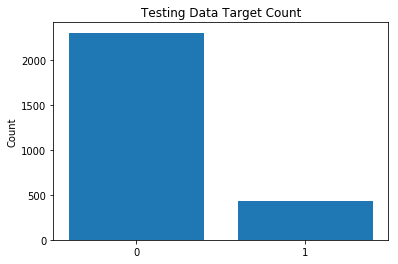

In [7]:
fig, ax = plt.subplots()
ax.bar(x=test_volcano.index, height=test_volcano.values, tick_label=[0, 1])
ax.set_title("Testing Data Target Count")
ax.set_ylabel("Count")
plt.show()

In [8]:
def make_volcano_pic(pic_record):
    return np.array(pic_record).reshape(110, 110)

In [9]:
data_train[labels_train["Volcano?"] == 1].head(n=10).index

Int64Index([0, 9, 15, 29, 34, 38, 40, 47, 55, 62], dtype='int64')

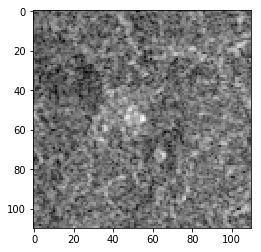

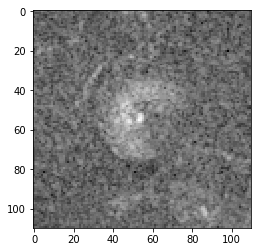

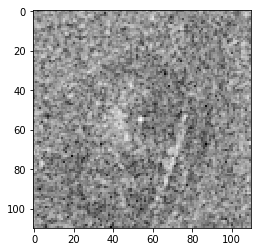

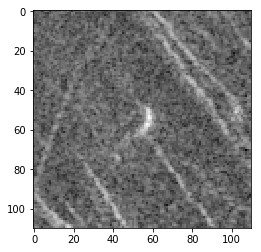

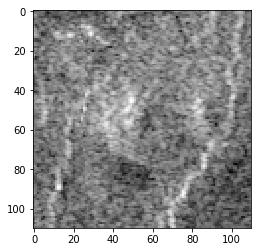

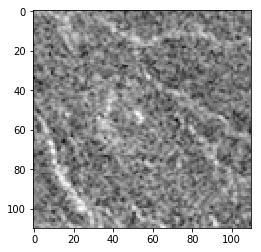

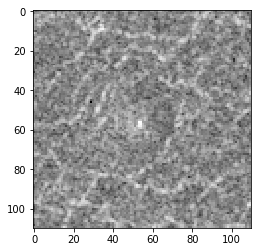

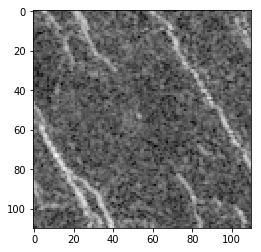

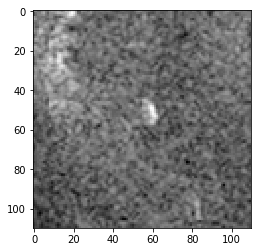

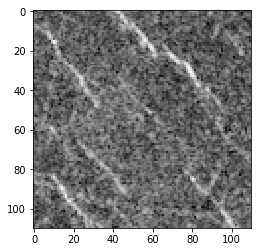

In [10]:
for pic in data_train[labels_train["Volcano?"] == 1].head(n=10).index:
    fig, ax = plt.subplots()
    ax.imshow(make_volcano_pic(data_train.iloc[pic]), cmap="gray")

In [11]:
data_train[labels_train["Volcano?"] == 0].head(n=10).index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 10, 11], dtype='int64')

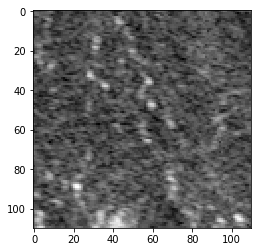

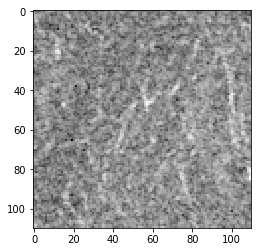

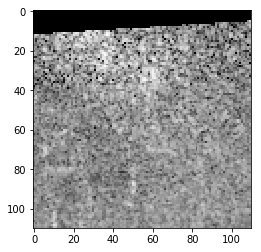

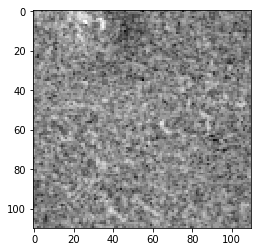

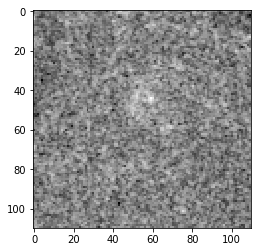

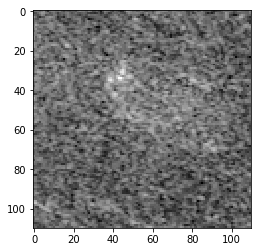

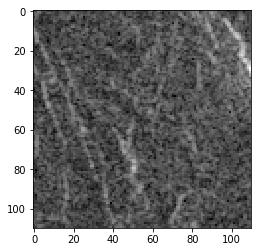

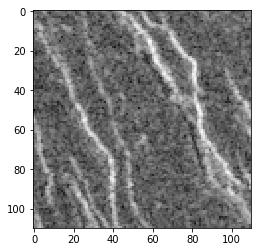

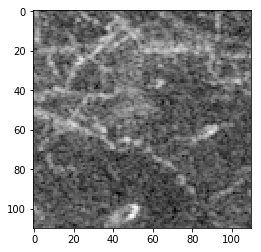

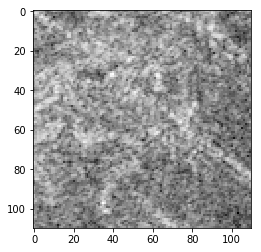

In [12]:
for pic in data_train[labels_train["Volcano?"] == 0].head(n=10).index:
    fig, ax = plt.subplots()
    ax.imshow(make_volcano_pic(data_train.iloc[pic]), cmap="gray")

## Prep data for modeling

In [13]:
X_train = np.array(data_train.values).astype("float32")
y_train = np.array(labels_train["Volcano?"].values).astype("float32")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_test = np.array(data_test.values).astype("float32")
y_test = np.array(labels_test["Volcano?"].values).astype("float32")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7000, 12100)
y_train shape: (7000,)
X_test shape: (2734, 12100)
y_test shape: (2734,)


In [14]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [15]:
y_test = to_categorical(y_test)

In [16]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
num_pixels = X_train.shape[1]
print("Number of pixels:", num_pixels)

Number of pixels: 12100


In [18]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255

## Baseline model

In [19]:
def baseline_model():
    model = Sequential()
    model.add(Dense(units=num_pixels, input_dim=num_pixels, kernel_initializer="normal", activation="relu"))
    model.add(Dense(units=2, kernel_initializer="normal", activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [20]:
model = baseline_model()
model.fit(X_train, y_train, epochs=3, batch_size=200)

Epoch 1/3
5400/7000 [======================>.......] - ETA: 27s - loss: 12.9540 - acc: 0.1869

KeyboardInterrupt: 

In [92]:
a = model.predict_proba(X_train[1:10,])

In [93]:
a

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## Logistic regression

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
scores = cross_val_score(lgr, X_train, y_train, cv=3)
print("Mean acc: {:.3f} +/- {:.4f}".format(np.mean(scores), np.std(scores)))

Mean acc: 0.927 +/- 0.0026


In [58]:
lgr.score(X_train, y_train)

0.9985714285714286

In [59]:
lgr.score(X_test, y_test)

0.9268471104608632

In [60]:
preds = lgr.predict(X_test)

In [61]:
preds

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [62]:
y_test

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [71]:
y_test.shape

(2734,)

In [70]:
print(accuracy_score(y_test, preds))

0.9268471104608632


In [73]:
print(precision_score(y_test, preds))

0.8726114649681529


In [74]:
print(recall_score(y_test, preds))

0.631336405529954


In [75]:
print(f1_score(y_test, preds))

0.732620320855615


In [67]:
print(confusion_matrix(y_test, preds))

[[2260   40]
 [ 160  274]]


In [68]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96      2300
        1.0       0.87      0.63      0.73       434

avg / total       0.92      0.93      0.92      2734



## Decision Trees ??

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
scores = cross_val_score(dct, X_train, y_train, cv=3)
print("Mean acc: {:.3f} +/- {:.4f}".format(np.mean(scores), np.std(scores)))

Mean acc: 0.891 +/- 0.0023


In [79]:
dct.score(X_test, y_test)

0.8858814923189466

In [80]:
preds = dct.predict(X_test)

In [81]:
print(accuracy_score(y_test, preds))

0.8858814923189466


In [82]:
print(precision_score(y_test, preds))

0.6639784946236559


In [83]:
print(recall_score(y_test, preds))

0.5691244239631337


In [84]:
print(f1_score(y_test, preds))

0.6129032258064517


In [85]:
print(confusion_matrix(y_test, preds))

[[2175  125]
 [ 187  247]]


In [86]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

        0.0       0.92      0.95      0.93      2300
        1.0       0.66      0.57      0.61       434

avg / total       0.88      0.89      0.88      2734

